In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.stats as ss
from scipy.interpolate import interp1d
from scipy.special import expit
from fractions import Fraction
from empiricaldist import Pmf, Cdf
import matplotlib.pyplot as plt
from collections import Counter
import statsmodels.formula.api as smfa

In [2]:
from data.utils import weibull_dist, make_uniform, make_joint, normalize, update_weibull, plot_contour, plot_lifelines

In [3]:
lam = 3
k = 0.8
actual_dist = weibull_dist(lam, k)
data = actual_dist.rvs(10)
data

array([ 0.59513654,  9.25374137,  0.48499561,  0.8068877 ,  6.50499046,
        8.52313662, 23.05296605,  0.14144805,  2.08027469,  0.35058733])

In [4]:
lams = np.linspace(0.1, 10.1, 101)
ks = np.linspace(0.1, 5.1, 101)
prior_lam = make_uniform(lams, name='lambda')
prior_k = make_uniform(ks, name='k')
prior = make_joint(prior_lam, prior_k)
prior

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,...,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10.0,10.1
0.10,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098
0.15,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098
0.20,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098
0.25,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098
0.30,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.90,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098
4.95,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098
5.00,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098
5.05,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098


In [5]:
lam_mesh, k_mesh, data_mesh = np.meshgrid(prior.columns, prior.index, data)
densities = weibull_dist(lam_mesh, k_mesh).pdf(data_mesh)
likelihood = densities.prod(axis=2)

In [6]:
posterior = prior * likelihood
normalize(posterior)
posterior

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,...,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10.0,10.1
0.10,1.461229e-09,1.803790e-09,1.983311e-09,2.095895e-09,2.172972e-09,2.228551e-09,2.269993e-09,2.301594e-09,2.326054e-09,2.345164e-09,...,2.152525e-09,2.149228e-09,2.145949e-09,2.142689e-09,2.139448e-09,2.136226e-09,2.133023e-09,2.129837e-09,2.126670e-09,2.123522e-09
0.15,3.419599e-08,5.772612e-08,7.292405e-08,8.350729e-08,9.124086e-08,9.707702e-08,1.015809e-07,1.051119e-07,1.079106e-07,1.101447e-07,...,9.428880e-08,9.398771e-08,9.368885e-08,9.339220e-08,9.309773e-08,9.280542e-08,9.251526e-08,9.222723e-08,9.194131e-08,9.165748e-08
0.20,1.460730e-07,4.104251e-07,6.478107e-07,8.431062e-07,1.001283e-06,1.129400e-06,1.233569e-06,1.318627e-06,1.388327e-06,1.445574e-06,...,1.169875e-06,1.163713e-06,1.157608e-06,1.151561e-06,1.145570e-06,1.139635e-06,1.133755e-06,1.127930e-06,1.122159e-06,1.116441e-06
0.25,1.701553e-07,1.028978e-06,2.258373e-06,3.547157e-06,4.759367e-06,5.846713e-06,6.799168e-06,7.622603e-06,8.328841e-06,8.931259e-06,...,7.084883e-06,7.030695e-06,6.977135e-06,6.924197e-06,6.871871e-06,6.820151e-06,6.769028e-06,6.718494e-06,6.668542e-06,6.619164e-06
0.30,5.805306e-08,1.057588e-06,3.699145e-06,7.561370e-06,1.202740e-05,1.663830e-05,2.111101e-05,2.528959e-05,2.909944e-05,3.251507e-05,...,2.681351e-05,2.653864e-05,2.626764e-05,2.600043e-05,2.573697e-05,2.547720e-05,2.522107e-05,2.496850e-05,2.471946e-05,2.447388e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.90,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.290066e-63,2.233473e-61,1.138850e-59,4.452743e-58,1.360521e-56,3.305828e-55,6.491301e-54,1.045420e-52,1.399870e-51,1.578326e-50
4.95,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.317509e-65,2.044822e-63,1.329786e-61,6.516569e-60,2.455862e-58,7.252051e-57,1.707127e-55,3.254650e-54,5.099443e-53,6.655425e-52
5.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.336319e-67,1.555335e-65,1.307659e-63,8.132788e-62,3.824123e-60,1.387002e-58,3.952590e-57,9.001530e-56,1.664068e-54,2.533415e-53
5.05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,6.249085e-70,9.744942e-68,1.074518e-65,8.593795e-64,5.103248e-62,2.298925e-60,8.012955e-59,2.200585e-57,4.841999e-56,8.668541e-55


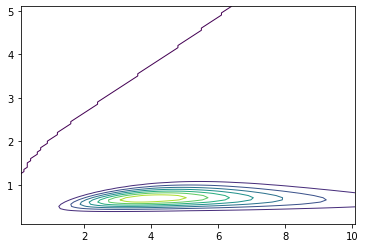

In [7]:
posterior = update_weibull(prior, data)
plot_contour(posterior)

In [8]:
start = np.random.uniform(0, 8, size=10)
start

array([6.31824639, 1.06424917, 1.12290722, 5.12195513, 7.85201652,
       2.39498698, 0.48616624, 6.08631969, 1.03606122, 4.467582  ])

In [9]:
duration = actual_dist.rvs(10)
duration

array([ 9.54905849,  2.01496768,  3.55182415,  0.97252657, 14.75416314,
        6.54183286,  0.29851097, 10.0193227 ,  4.7646701 ,  8.02118227])

In [10]:
obs = pd.DataFrame(dict(start=start, end=start+duration)).sort_values(by='start', ignore_index=True)
obs

,start,end
0,0.486166,0.784677
1,1.036061,5.800731
2,1.064249,3.079217
3,1.122907,4.674731
4,2.394987,8.936820
5,4.467582,12.488764
6,5.121955,6.094482
7,6.086320,16.105642
8,6.318246,15.867305
9,7.852017,22.606180


In [11]:
censored = obs['end'] > 8
obs.loc[censored, 'end'] = 8
obs.loc[censored, 'status'] = 0
obs

,start,end,status
0,0.486166,0.784677,NaN
1,1.036061,5.800731,NaN
2,1.064249,3.079217,NaN
3,1.122907,4.674731,NaN
4,2.394987,8.000000,0.0
5,4.467582,8.000000,0.0
6,5.121955,6.094482,NaN
7,6.086320,8.000000,0.0
8,6.318246,8.000000,0.0
9,7.852017,8.000000,0.0


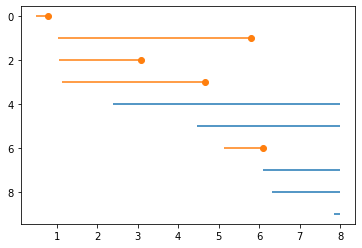

In [12]:
plot_lifelines(obs)

In [13]:
obs['T'] = obs['end'] - obs['start']

In [14]:
data1 = obs.loc[~censored, 'T']
data2 = obs.loc[censored, 'T']

In [17]:
# prior는 lam과 k과 uniform distribution을 따르는 형태
posterior1 = update_weibull(prior, data1)
posterior2 = update_weibull(posterior1, data2, complete=False)

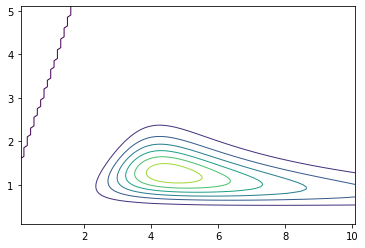

In [18]:
plot_contour(posterior2)

In [22]:
posterior_lam1 = Pmf(posterior1.stack()).marginal(1)
posterior_k1 = Pmf(posterior1.stack()).marginal(0)
posterior_lam2 = Pmf(posterior2.stack()).marginal(1)
posterior_k2 = Pmf(posterior2.stack()).marginal(0)

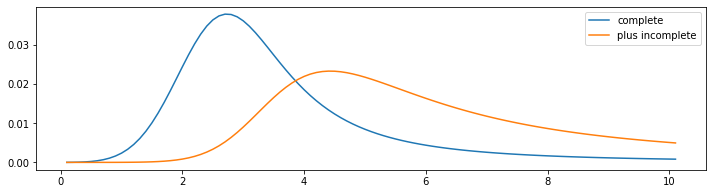

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
posterior_lam1.plot(ax=ax, label='complete')
posterior_lam2.plot(ax=ax, label='plus incomplete')
plt.legend()
plt.show()

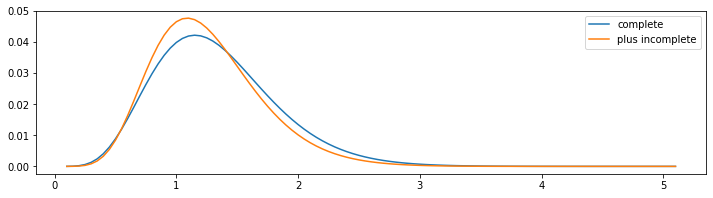

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
posterior_k1.plot(ax=ax, label='complete')
posterior_k2.plot(ax=ax, label='plus incomplete')
plt.legend()
plt.show()

In [25]:
df = pd.read_csv(Path.cwd() / 'data' / 'lamps.csv')

In [26]:
pmf_bulb = Pmf(df['f'].to_numpy(), df['h'])
pmf_bulb.normalize()

50

In [29]:
lams = np.linspace(1000, 2000, 101)
ks = np.linspace(1, 10, 101)
prior_lam = make_uniform(lams, name='lambda')
prior_k = make_uniform(ks, name='k')
prior_bulb = make_joint(prior_lam, prior_k)
prior_bulb

,1000.0,1010.0,1020.0,1030.0,1040.0,1050.0,1060.0,1070.0,1080.0,1090.0,...,1910.0,1920.0,1930.0,1940.0,1950.0,1960.0,1970.0,1980.0,1990.0,2000.0
1.00,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098
1.09,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098
1.18,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098
1.27,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098
1.36,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.64,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098
9.73,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098
9.82,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098
9.91,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098


In [30]:
# np.repeat 고려 필요
data_bulb = np.repeat(df['h'], df['f'])
len(data_bulb)

50

In [31]:
posterior_bulb = update_weibull(prior_bulb, data_bulb)
posterior_bulb

,1000.0,1010.0,1020.0,1030.0,1040.0,1050.0,1060.0,1070.0,1080.0,1090.0,...,1910.0,1920.0,1930.0,1940.0,1950.0,1960.0,1970.0,1980.0,1990.0,2000.0
1.00,2.036691e-25,2.493608e-25,3.026215e-25,3.641430e-25,4.345817e-25,5.145403e-25,6.045504e-25,7.050539e-25,8.163873e-25,9.387655e-25,...,7.664857e-25,7.158618e-25,6.681529e-25,6.232343e-25,5.809822e-25,5.412741e-25,5.039895e-25,4.690099e-25,4.362199e-25,4.055067e-25
1.09,5.449887e-24,6.974544e-24,8.829718e-24,1.106231e-23,1.372052e-23,1.685283e-23,2.050682e-23,2.472783e-23,2.955764e-23,3.503302e-23,...,3.121966e-23,2.883225e-23,2.660767e-23,2.453702e-23,2.261164e-23,2.082312e-23,1.916334e-23,1.762446e-23,1.619898e-23,1.487970e-23
1.18,9.191480e-23,1.236524e-22,1.641861e-22,2.152736e-22,2.788439e-22,3.569719e-22,4.518437e-22,5.657118e-22,7.008409e-22,8.594456e-22,...,8.700562e-22,7.940719e-22,7.241106e-22,6.597702e-22,6.006662e-22,5.464319e-22,4.967190e-22,4.511975e-22,4.095553e-22,3.714987e-22
1.27,1.020933e-21,1.452568e-21,2.034589e-21,2.807158e-21,3.817195e-21,5.118430e-21,6.771139e-21,8.841536e-21,1.140078e-20,1.452356e-20,...,1.747735e-20,1.575452e-20,1.418797e-20,1.276534e-20,1.147501e-20,1.030609e-20,9.248370e-21,8.292360e-21,7.429216e-21,6.650738e-21
1.36,7.720367e-21,1.169270e-20,1.738347e-20,2.538648e-20,3.644182e-20,5.145211e-20,7.149478e-20,9.782829e-20,1.318906e-19,1.752880e-19,...,2.638086e-19,2.347512e-19,2.086715e-19,1.852970e-19,1.643753e-19,1.456736e-19,1.289775e-19,1.140900e-19,1.008310e-19,8.903585e-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.64,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.019929e-32,2.900361e-33,7.807714e-34,1.997365e-34,4.873211e-35,1.137782e-35,2.550092e-36,5.502813e-37,1.146417e-37,2.311798e-38
9.73,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.465081e-33,7.063749e-34,1.912073e-34,4.908859e-35,1.199752e-35,2.801296e-36,6.269106e-37,1.348845e-37,2.798161e-38,5.611800e-39
9.82,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.850465e-34,1.691105e-34,4.607380e-35,1.188109e-35,2.911206e-36,6.802808e-37,1.521188e-37,3.265433e-38,6.749266e-39,1.346916e-39
9.91,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.363156e-34,3.978967e-35,1.092192e-35,2.831542e-36,6.961596e-37,1.629319e-37,3.642970e-38,7.807243e-39,1.608712e-39,3.196358e-40
